In [27]:
# EDA
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

# ML
from sklearn.cluster import AgglomerativeClustering, BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

# Otimização
import optuna

# Carregar os dados

In [28]:
# Carregar Dataframe
df_laptops = pd.read_csv('datasets/laptops_new.csv')

In [29]:
# Analisar a estrututra
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   model                     991 non-null    object 
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    object 
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    object 
 13  gpu_type                  991 non-null    object 
 14  is_touch_s

In [30]:
# Visualizar os primeiros registros
df_laptops.head(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1
5,6,apple,Apple MacBook Air 2020 MGND3HN Laptop (Apple M...,851.41,45,apple,m1,8,8,8,SSD,256,apple,apple,False,13.3,2560,1600,mac,1
6,7,infinix,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,419.65,56,intel,core i5,4,8,16,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
7,8,asus,Asus TUF Gaming F15 FX506HF-HN024W Gaming Lapt...,599.55,70,intel,core i5,6,12,8,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
8,9,hp,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,443.64,60,intel,core i3,6,8,8,SSD,512,intel,integrated,False,15.6,1920,1080,windows,1
9,10,infinix,Infinix Zerobook 2023 Laptop (13th Gen Core i9...,719.48,71,intel,core i9,14,20,32,SSD,1024,intel,integrated,False,15.6,1920,1080,windows,1


In [31]:
# Visualizar os ultimos registros
df_laptops.tail(10)

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
981,993,msi,MSI Katana 15 B13VFK-296IN Gaming Laptop (13th...,1439.09,76,intel,core i7,10,16,16,SSD,1024,nvidia,dedicated,False,15.6,1920,1080,windows,2
982,994,asus,Asus Zenbook 14 OLED 2023 UM3402YA-KM551WS Lap...,935.36,68,amd,ryzen 5,6,12,16,SSD,1024,amd,integrated,False,14.0,2880,1800,windows,1
983,995,asus,Asus Vivobook 16 2023 M1605YA-MB551WS Laptop (...,803.44,65,amd,ryzen 5,6,12,16,SSD,1024,amd,integrated,False,16.0,1920,1200,windows,1
984,996,asus,Asus Vivobook 16 2023 M1605YA-MB541WS Laptop (...,719.48,64,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,False,16.0,1920,1200,windows,1
985,997,acer,Acer Nitro 5 AN515-47 NH.QL3SI.003 Gaming Lapt...,905.50,67,amd,ryzen 7,8,16,8,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,791.44,68,amd,ryzen 5,6,12,16,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,1
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,1103.27,73,intel,core i7,10,16,16,SSD,512,nvidia,dedicated,False,15.6,1920,1080,windows,2
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,539.58,59,amd,ryzen 5,4,8,8,SSD,512,amd,integrated,False,15.6,1920,1080,windows,1
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,815.43,68,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,False,14.0,2560,1600,windows,1
990,1002,hp,HP Chromebook 15a-na0008TU Laptop (Intel Celer...,251.74,37,intel,celeron,2,2,4,HDD,128,intel,integrated,False,15.6,1366,768,chrome,1


In [32]:
df_laptops.describe()

,index,price,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,display_size,resolution_width,resolution_height
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,926.687487,63.931382,8.128153,12.191726,13.047427,610.938446,15.171241,2003.503532,1181.227043
std,287.899458,688.239764,10.190575,4.215499,5.585115,5.591188,266.927666,0.938089,361.965292,263.884019
min,1.000000,117.540000,24.000000,2.000000,0.000000,2.000000,32.000000,10.100000,1080.000000,768.000000
25%,258.500000,522.850000,58.000000,6.000000,8.000000,8.000000,512.000000,14.000000,1920.000000,1080.000000
50%,507.000000,742.390000,64.000000,8.000000,12.000000,16.000000,512.000000,15.600000,1920.000000,1080.000000
75%,754.500000,1070.350000,71.000000,10.000000,16.000000,16.000000,512.000000,15.600000,1920.000000,1200.000000
max,1002.000000,5450.880000,89.000000,24.000000,32.000000,36.000000,2048.000000,18.000000,3840.000000,2560.000000


In [33]:
# Checar a variável year_of_warranty
df_laptops['year_of_warranty'].unique()

array(['1', '2', 'No information', '3'], dtype=object)

In [34]:
# Ajustar a variável year_of_warranty para int e No information para 0
# df_laptops['year_of_warranty'] = df_laptops['year_of_warranty'].replace('No information', 0).astype(int)
df_laptops.loc[df_laptops['year_of_warranty'] == 'No information', 'year_of_warranty'] = 1
df_laptops['year_of_warranty'] = df_laptops['year_of_warranty'].astype(int)

In [35]:
# Checar a variável year_of_warranty
df_laptops['year_of_warranty'].unique()

array([1, 2, 3])

In [36]:
df_laptops.describe()

,index,price,rating,num_cores,num_threads,ram_memory,primary_storage_capacity,display_size,resolution_width,resolution_height,year_of_warranty
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,926.687487,63.931382,8.128153,12.191726,13.047427,610.938446,15.171241,2003.503532,1181.227043,1.083754
std,287.899458,688.239764,10.190575,4.215499,5.585115,5.591188,266.927666,0.938089,361.965292,263.884019,0.311478
min,1.000000,117.540000,24.000000,2.000000,0.000000,2.000000,32.000000,10.100000,1080.000000,768.000000,1.000000
25%,258.500000,522.850000,58.000000,6.000000,8.000000,8.000000,512.000000,14.000000,1920.000000,1080.000000,1.000000
50%,507.000000,742.390000,64.000000,8.000000,12.000000,16.000000,512.000000,15.600000,1920.000000,1080.000000,1.000000
75%,754.500000,1070.350000,71.000000,10.000000,16.000000,16.000000,512.000000,15.600000,1920.000000,1200.000000,1.000000
max,1002.000000,5450.880000,89.000000,24.000000,32.000000,36.000000,2048.000000,18.000000,3840.000000,2560.000000,3.000000


In [37]:
# Transformar variavel boolear em int (is_touch_screen)
df_laptops['is_touch_screen'] = df_laptops['is_touch_screen'].astype(int) 

In [38]:
df_laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     991 non-null    int64  
 1   brand                     991 non-null    object 
 2   model                     991 non-null    object 
 3   price                     991 non-null    float64
 4   rating                    991 non-null    int64  
 5   processor_brand           991 non-null    object 
 6   processor_tier            991 non-null    object 
 7   num_cores                 991 non-null    int64  
 8   num_threads               991 non-null    int64  
 9   ram_memory                991 non-null    int64  
 10  primary_storage_type      991 non-null    object 
 11  primary_storage_capacity  991 non-null    int64  
 12  gpu_brand                 991 non-null    object 
 13  gpu_type                  991 non-null    object 
 14  is_touch_s

In [39]:
# Distribuição da variável brand
percentual_brand = df_laptops['brand'].value_counts(normalize=True) * 100
px.bar(percentual_brand, title='Distribuição da variável brand', color=percentual_brand.index)

In [40]:
# Distribuição da variavel processor_brand
percentual_processor_brand = df_laptops['processor_brand'].value_counts(normalize=True) * 100
px.bar(percentual_processor_brand, title='Distribuição da variável processor_brand', color=percentual_processor_brand.index)

<Axes: xlabel='price', ylabel='Count'>

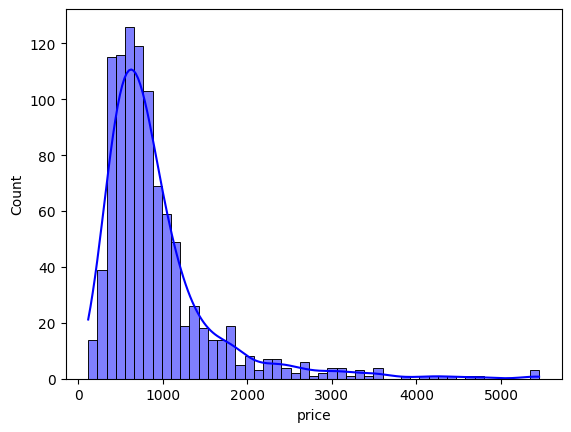

In [41]:
# Distribuição da variável price
sns.histplot(df_laptops['price'], kde=True, color='blue')

<Axes: xlabel='rating', ylabel='Count'>

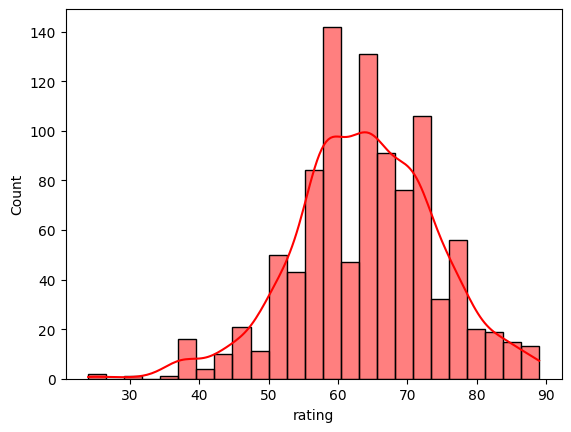

In [42]:
# Distribuição da variável Rating
sns.histplot(df_laptops['rating'], kde=True, color='red')

In [43]:
# Plot de distribuição da variável price por brand
px.box(df_laptops, x='price', y='brand', title='Distribuição da variável price por brand', color='brand')

In [44]:
# Plot de distribuição da variável rating por brand
px.box(df_laptops, x='rating', y='brand', title='Distribuição da variável rating por brand', color='brand')

In [45]:
# Scatterplot de price e rating
px.scatter(df_laptops, x='price', y='rating', title='Scatterplot de price e rating', color='brand')

# Treinar modelos clustering hierárquico

In [46]:
df_laptops

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,primary_storage_type,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,SSD,512,intel,integrated,0,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,SSD,1024,intel,integrated,0,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,SSD,512,amd,dedicated,0,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,SSD,512,intel,integrated,0,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,SSD,512,amd,integrated,0,15.6,1920,1080,windows,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,998,asus,Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...,791.44,68,amd,ryzen 5,6,12,16,SSD,512,nvidia,dedicated,0,15.6,1920,1080,windows,1
987,999,msi,MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...,1103.27,73,intel,core i7,10,16,16,SSD,512,nvidia,dedicated,0,15.6,1920,1080,windows,2
988,1000,asus,Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...,539.58,59,amd,ryzen 5,4,8,8,SSD,512,amd,integrated,0,15.6,1920,1080,windows,1
989,1001,asus,Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...,815.43,68,amd,ryzen 5,6,12,16,SSD,512,amd,integrated,0,14.0,2560,1600,windows,1


In [47]:
# Selecionar as colunas para a clusterização
X = df_laptops.copy()

# Remover as colunas que não serão utilizadas
X.drop(['index', 'model'], axis=1, inplace=True)

In [48]:
# Separando as variáveis categóricas e numéricas
numeric_features = ['price', 'rating', 'num_cores', 'num_threads', 'ram_memory', 'primary_storage_capacity', 'display_size', 'resolution_width', 'resolution_height']
categorical_features = ['brand', 'processor_brand', 'gpu_brand', 'gpu_type', 'os']

In [49]:
# Definir transformações
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [50]:
# Aplicar transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [51]:
# Transformar os dados
X_transformed = preprocessor.fit_transform(X)

In [52]:
X_transformed

<991x54 sparse matrix of type '<class 'numpy.float64'>'
	with 13874 stored elements in Compressed Sparse Row format>

In [53]:
import optuna

def hierarquical_aglomerative_objective(trial: optuna.Trial):
    # Definir os hipermarametros a serem ajustados
    n_clusters = trial.suggest_int('n_clusters', 10, 150)
    # Linkage = Critério de distância entre dois conjuntos para formar os clusters
    # ward = minimiza a variância dos clusters
    # average = minimiza a média das distâncias entre os clusters
    # complete = minimiza a máxima distância entre os clusters
    # single = minimiza a distância entre os clusters mais próximos
    linkage = trial.suggest_categorical('linkage', ['ward', 'average', 'complete', 'single'])

    # Instanciar o modelo
    hierarquical_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)

    # Treinar o modelo
    y = hierarquical_model.fit_predict(X_transformed.toarray())

    # Calcular o silhouette_score
    silhouette_avg = silhouette_score(X_transformed, y)

    return silhouette_avg

In [54]:
# Criar um estudo de otimização
search_space_ag = {
    'n_clusters': range(10, 151),
    'linkage': ['ward', 'average', 'complete', 'single']
}

sampler_ag = optuna.samplers.GridSampler(search_space=search_space_ag)

study_ag = optuna.create_study(direction='maximize', sampler=sampler_ag)

[I 2024-06-17 22:26:36,179] A new study created in memory with name: no-name-05dcb2f5-5e4e-421b-ae35-ca27a89e6ec7


In [55]:
# Executar o estudo do optuna para o modelo hierarquical aglomerative
study_ag.optimize(hierarquical_aglomerative_objective, n_trials=600)

[I 2024-06-17 22:26:36,231] Trial 0 finished with value: 0.23342747758705054 and parameters: {'n_clusters': 59, 'linkage': 'ward'}. Best is trial 0 with value: 0.23342747758705054.
[I 2024-06-17 22:26:36,265] Trial 1 finished with value: 0.23828051215019258 and parameters: {'n_clusters': 131, 'linkage': 'average'}. Best is trial 1 with value: 0.23828051215019258.
[I 2024-06-17 22:26:36,298] Trial 2 finished with value: 0.21041782467273695 and parameters: {'n_clusters': 87, 'linkage': 'complete'}. Best is trial 1 with value: 0.23828051215019258.
[I 2024-06-17 22:26:36,335] Trial 3 finished with value: -0.03819171837578918 and parameters: {'n_clusters': 75, 'linkage': 'single'}. Best is trial 1 with value: 0.23828051215019258.
[I 2024-06-17 22:26:36,368] Trial 4 finished with value: 0.18989917089382646 and parameters: {'n_clusters': 51, 'linkage': 'average'}. Best is trial 1 with value: 0.23828051215019258.
[I 2024-06-17 22:26:36,400] Trial 5 finished with value: 0.16949061368130935 and 

In [56]:
# Mostrar melhor configuração do optuna para o modelo hierarquical aglomerative
best_params_ag = study_ag.best_params

print(f'Melhores parâmetros para o modelo hierarquical aglomerative: ')
print(f'n_clusters: {best_params_ag["n_clusters"]}')
print(f'linkage: {best_params_ag["linkage"]}')

Melhores parâmetros para o modelo hierarquical aglomerative: 
n_clusters: 149
linkage: ward


In [57]:
best_params_ag

{'n_clusters': 149, 'linkage': 'ward'}

In [58]:
def hierarquical_divisive_objective(trial: optuna.Trial):
    # Definir os hipermarametros a serem ajustados
    n_clusters = trial.suggest_int('n_clusters', 10, 150)
    
    # Instanciar o modelo
    hierarquical_model = BisectingKMeans(n_clusters=n_clusters)

    # Treinar o modelo
    y = hierarquical_model.fit_predict(X_transformed.toarray())

    # Calcular o silhouette_score
    silhouette_avg = silhouette_score(X_transformed, y)

    return silhouette_avg

In [59]:
# Criar um estudo de otimização
search_space_di = {
    'n_clusters': range(10, 151),
    'linkage': ['ward', 'average', 'complete', 'single']
}

sampler_di = optuna.samplers.GridSampler(search_space=search_space_di)

study_di = optuna.create_study(direction='maximize', sampler=sampler_di)

[I 2024-06-17 22:29:47,405] A new study created in memory with name: no-name-7fb0b9f6-9c5d-4807-a1a1-9769c5372c47


In [60]:
# Executar o estudo do optuna para o modelo hierarquical divisive
study_di.optimize(hierarquical_divisive_objective, n_trials=200)

[I 2024-06-17 22:30:18,076] Trial 0 finished with value: 0.18410687545467905 and parameters: {'n_clusters': 130}. Best is trial 0 with value: 0.18410687545467905.
[I 2024-06-17 22:30:18,167] Trial 1 finished with value: 0.18158017746269967 and parameters: {'n_clusters': 132}. Best is trial 0 with value: 0.18410687545467905.
[I 2024-06-17 22:30:18,234] Trial 2 finished with value: 0.19158311428487093 and parameters: {'n_clusters': 133}. Best is trial 2 with value: 0.19158311428487093.
[I 2024-06-17 22:30:18,266] Trial 3 finished with value: 0.1422097642689954 and parameters: {'n_clusters': 11}. Best is trial 2 with value: 0.19158311428487093.
[I 2024-06-17 22:30:18,297] Trial 4 finished with value: 0.14096542403986265 and parameters: {'n_clusters': 10}. Best is trial 2 with value: 0.19158311428487093.
[I 2024-06-17 22:30:18,421] Trial 5 finished with value: 0.20133319839753155 and parameters: {'n_clusters': 123}. Best is trial 5 with value: 0.20133319839753155.
[I 2024-06-17 22:30:18,54

In [66]:
# Mostrar melhor configuração do optuna para o modelo hierarquical divisive
best_params_di = study_di.best_params

print(f'Melhores parâmetros para o modelo hierarquical divisive: ')
print(f'n_clusters: {best_params_di["n_clusters"]}')

Melhores parâmetros para o modelo hierarquical divisive: 
n_clusters: 145


In [67]:
# Criar modelo com melhor configuração
best_model = AgglomerativeClustering(n_clusters=best_params_ag['n_clusters'], linkage=best_params_ag['linkage'])

In [71]:
# Treinar o modelo
best_model.fit(X_transformed.toarray())

AgglomerativeClustering(n_clusters=149)

In [72]:
# Verificar Silhouette Score
best_score = silhouette_score(X_transformed, best_model.labels_)

In [73]:
best_score

0.3274548072143168

In [74]:
# Criar coluna com cluster escolhido no Dataframe original
df_laptops['cluster'] = best_model.labels_

In [75]:
df_laptops.head()

,index,brand,model,price,rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,primary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,os,year_of_warranty,cluster
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,287.72,63,intel,core i3,2,4,8,...,512,intel,integrated,0,15.6,1920,1080,windows,1,73
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,431.64,67,intel,core i7,4,8,16,...,1024,intel,integrated,0,15.6,1920,1080,windows,1,44
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,612.86,73,amd,ryzen 5,6,12,8,...,512,amd,dedicated,0,15.6,1920,1080,windows,1,28
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,479.62,62,intel,core i5,12,16,8,...,512,intel,integrated,0,14.0,1920,1080,windows,1,53
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,342.77,62,amd,ryzen 3,4,8,8,...,512,amd,integrated,0,15.6,1920,1080,windows,1,14


# Visualizar Resultados

In [77]:
# Mostrar chart com trials do optuna
fig = optuna.visualization.plot_optimization_history(study_ag)
fig.show()

In [80]:
# Treinar modelo com scipy
modelo_de = linkage(X_transformed.toarray(), method=best_params_ag['linkage'], optimal_ordering=True)

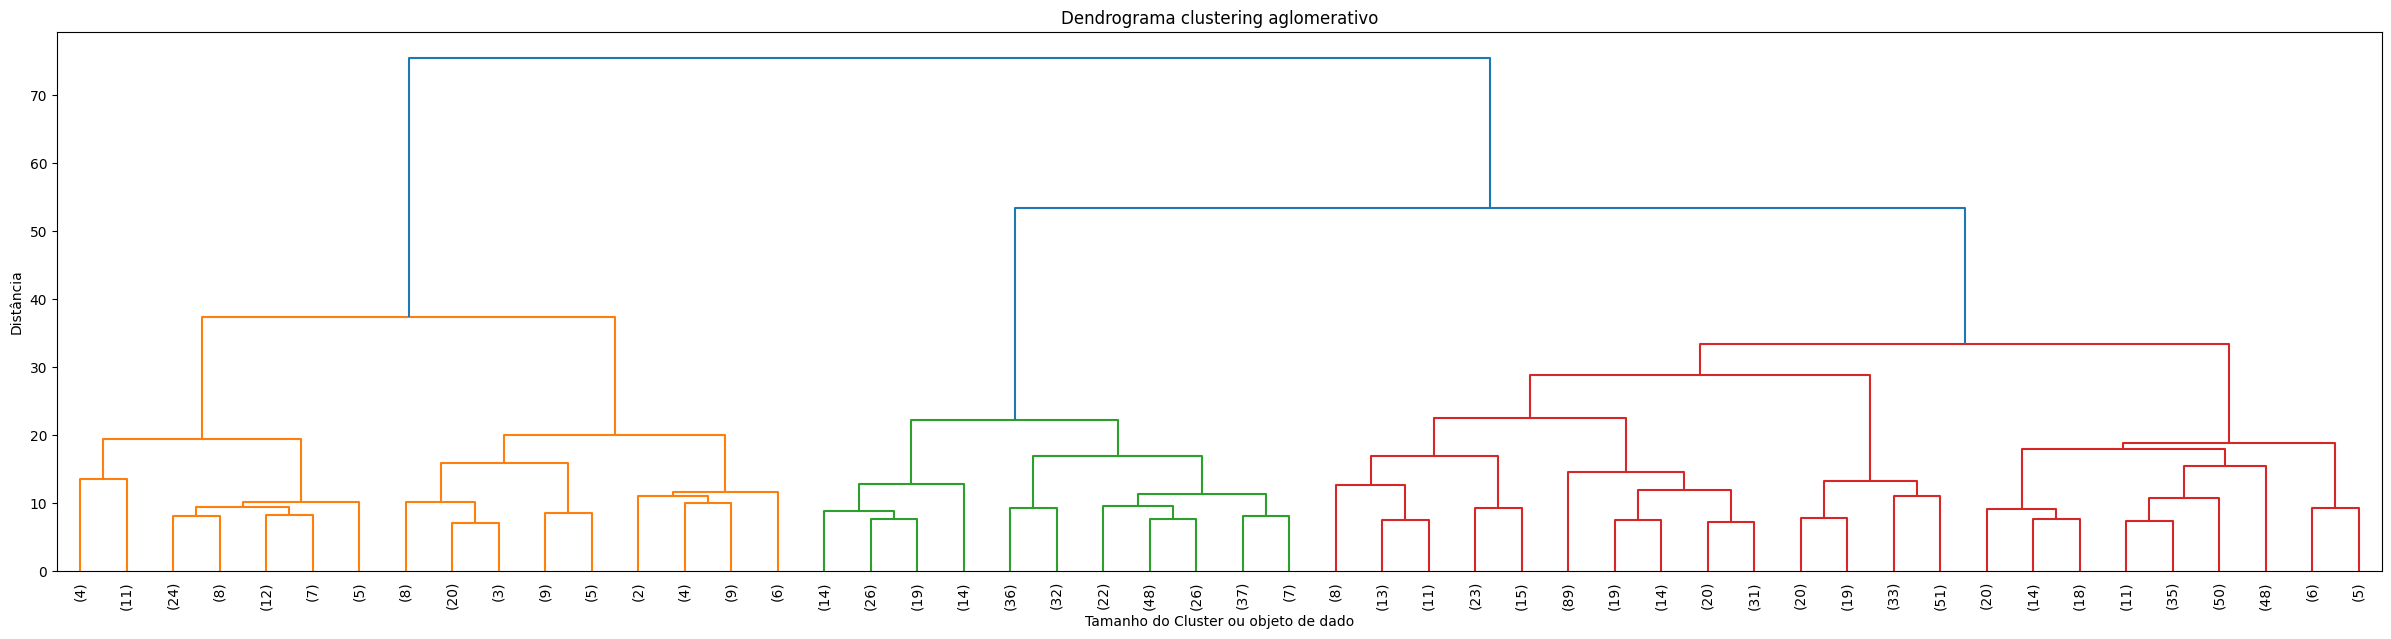

In [103]:
# Mostrar dendrograma
plt.figure(figsize=(30, 7))
dendrogram(modelo_de, truncate_mode='lastp', p=50, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma clustering aglomerativo')
plt.xlabel('Tamanho do Cluster ou objeto de dado')
plt.ylabel('Distância')
plt.show()

In [106]:
# Cortar o dendrograma
clusters_de_scipy = cut_tree(modelo_de, height=32)
np.unique(clusters_de_scipy).size

5

In [107]:
# Cruzamento entre brand e price, apresetando os clusters
px.scatter(df_laptops, x='brand', y='price', color='cluster')

In [111]:
# Cruzamento entre brand e price, apresetando os clusters
px.scatter(df_laptops, x='cluster', y='price', color='brand')

In [109]:
# Cruzamento entre brand e rating, apresetando os clusters
px.scatter(df_laptops, x='cluster', y='rating', color='brand')

In [110]:
# Cruzamento entre brand e rating, apresetando os clusters
px.scatter(df_laptops, x='brand', y='rating', color='cluster')

In [112]:
# Distribuição da variável cluster
percentual_brand = df_laptops['cluster'].value_counts(normalize=True) * 100
px.bar(percentual_brand, title='Distribuição da variável cluster', color=percentual_brand.index)

In [113]:
# Distribuição da variável cluster
percentual_brand = df_laptops['cluster'].value_counts()
px.bar(percentual_brand, title='Distribuição da variável cluster', color=percentual_brand.index)

# Salvar modelo, preprocessor e csv atualizado

In [114]:
# Salvar modelo e preprocessor
import joblib

# Salvar modelo
joblib.dump(best_model, 'models/modelo_clusterizacao_laptops.pkl')

# Salvar preprocessor
joblib.dump(preprocessor, 'models/preprocessor_clusterizacao_laptops.pkl')

['models/preprocessor_clusterizacao_laptops.pkl']

In [115]:
# Salvar CSV atualizado com dados de cluster
df_laptops.to_csv('datasets/clusterizacao_laptops.csv', index=False)